In [54]:
import os
import numpy as np
picture_folder = './pic'
os.makedirs(picture_folder, exist_ok=True)
experimentations = []
plotting = "logs/plotting"
for r, d, f in os.walk(plotting):
    for folder in d:
        experimentations.append(np.load(os.path.join(plotting, folder, "learning_curves.npy"))[()])
        exp_config = np.genfromtxt(os.path.join(plotting, folder, "exp_config.txt"), delimiter="    ", dtype=str)
        config = {}
        for line in exp_config:
            config[line[0]] = line[1]
        experimentations[-1]['config'] = config
experimentations = sorted(experimentations, key=lambda i: (i['config']['model'], i['config']['optimizer'], i['config']['num_layers']))
for i, exp in enumerate(experimentations):
    exp['id'] = i + 1
len(experimentations)

17

In [55]:
# Generate experimentations table with all the hyperparameters
print("Experimentation & Model & Optimizer & Number of layers & Batch size & Dropout keep probability & Embedding size & Hidden size & Initial LR & Number of epochs \\\\")
for exp in experimentations:
    print("{} & {} & {} & {} & {} & {} & {} & {} & {} & {} \\\\".format(exp['id'],
                                                                        exp['config']['model'],
                                                                        exp['config']['optimizer'],
                                                                        exp['config']['num_layers'],
                                                                        exp['config']['batch_size'],
                                                                        exp['config']['dp_keep_prob'],
                                                                        exp['config']['emb_size'],
                                                                        exp['config']['hidden_size'],
                                                                        exp['config']['initial_lr'],
                                                                        exp['config']['num_epochs']))

Experimentation & Model & Optimizer & Number of layers & Batch size & Dropout keep probability & Embedding size & Hidden size & Initial LR & Number of epochs \\
1 & GRU & ADAM & 2 & 20 & 0.35 & 200 & 1500 & 0.0001 & 40 \\
2 & GRU & SGD & 2 & 20 & 0.35 & 200 & 1500 & 10.0 & 40 \\
3 & GRU & SGD_LR_SCHEDULE & 1 & 20 & 0.35 & 200 & 1500 & 10.0 & 40 \\
4 & GRU & SGD_LR_SCHEDULE & 2 & 20 & 0.5 & 200 & 1500 & 10.0 & 40 \\
5 & GRU & SGD_LR_SCHEDULE & 2 & 20 & 0.35 & 200 & 1500 & 10.0 & 40 \\
6 & GRU & SGD_LR_SCHEDULE & 5 & 20 & 0.35 & 200 & 1500 & 10.0 & 40 \\
7 & RNN & ADAM & 1 & 20 & 0.35 & 200 & 1500 & 0.0001 & 40 \\
8 & RNN & ADAM & 2 & 20 & 0.35 & 200 & 1500 & 0.0001 & 40 \\
9 & RNN & ADAM & 2 & 20 & 0.35 & 200 & 1500 & 0.0001 & 40 \\
10 & RNN & ADAM & 2 & 20 & 0.5 & 200 & 1500 & 0.0001 & 40 \\
11 & RNN & ADAM & 5 & 20 & 0.35 & 200 & 1500 & 0.0001 & 40 \\
12 & RNN & SGD & 2 & 20 & 0.35 & 200 & 1500 & 0.0001 & 40 \\
13 & RNN & SGD_LR_SCHEDULE & 2 & 20 & 0.35 & 200 & 512 & 1.0 & 40 \\
14 & 

In [56]:
for i, exp in enumerate(experimentations):
    exp['id'] = i + 1
    print(exp['id'])
    if 'times' in exp:
        times = [0]
        for time in exp['times']:
            times.append(times[-1] + time)
        times = times[1:]
        exp['times'] = times
    else:
        exp['times'] = [0]*exp['']

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17


KeyError: 'times'

In [39]:
# Generate summarizing table content for train and validation performance
print("Experimentation & Model & Optimizer & Train perplexity & Validation perplexity \\\\")
for exp in experimentations:
    k = np.argmin(exp['val_ppls'])
    print("{} & {} & {} & {} & {} \\\\".format(exp['id'],
                                               exp['config']['model'],
                                               exp['config']['optimizer'],
                                               exp['train_ppls'][k],
                                               exp['val_ppls'][k]))

Experimentation & Model & Optimizer & Train perplexity & Validation perplexity \\
1 & GRU & ADAM & 74.38241891518238 & 113.26937126854146 \\
2 & GRU & SGD & 61.12380874225495 & 115.72991359862715 \\
3 & GRU & SGD_LR_SCHEDULE & 60.10882289407742 & 95.96335558678402 \\
4 & GRU & SGD_LR_SCHEDULE & 29.948576074958023 & 118.51076024423463 \\
5 & GRU & SGD_LR_SCHEDULE & 64.7247971950143 & 104.25559532945779 \\
6 & GRU & SGD_LR_SCHEDULE & 107.7252326984317 & 134.72617760217295 \\
7 & RNN & ADAM & 113.89089991304077 & 149.21625634910782 \\
8 & RNN & ADAM & 120.27130278557576 & 154.9008283470609 \\
9 & RNN & ADAM & 105.58097607837522 & 146.87729581143083 \\
10 & RNN & SGD & 3743.1108302246707 & 2634.687126497896 \\
11 & RNN & SGD_LR_SCHEDULE & 229.06830757823496 & 194.41144715822495 \\
12 & TRANSFORMER & SGD_LR_SCHEDULE & 127.56328232301398 & 215.65013428053902 \\


1_Mod=GRU_Opt=ADAM_Dp=0.35_Emb=200_Hid=1500_LR=0.0001_Lay=2


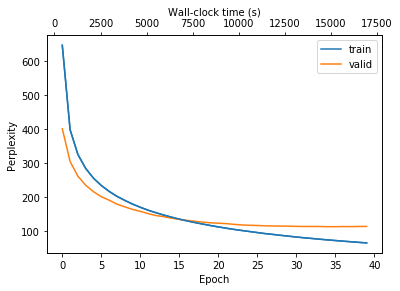

2_Mod=GRU_Opt=SGD_Dp=0.35_Emb=200_Hid=1500_LR=10.0_Lay=2


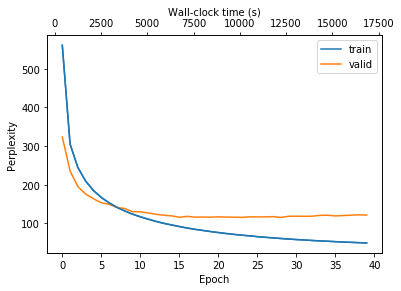

3_Mod=GRU_Opt=SGD_LR_SCHEDULE_Dp=0.35_Emb=200_Hid=1500_LR=10.0_Lay=1


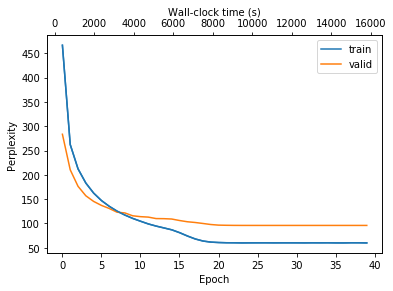

4_Mod=GRU_Opt=SGD_LR_SCHEDULE_Dp=0.5_Emb=200_Hid=1500_LR=10.0_Lay=2


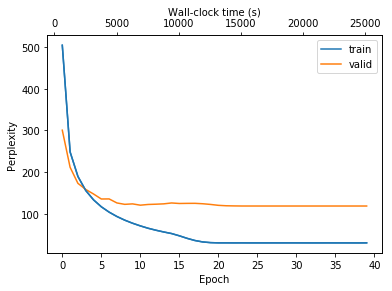

5_Mod=GRU_Opt=SGD_LR_SCHEDULE_Dp=0.35_Emb=200_Hid=1500_LR=10.0_Lay=2


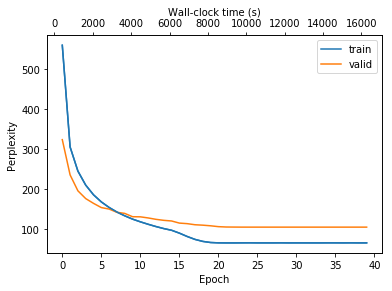

6_Mod=GRU_Opt=SGD_LR_SCHEDULE_Dp=0.35_Emb=200_Hid=1500_LR=10.0_Lay=5


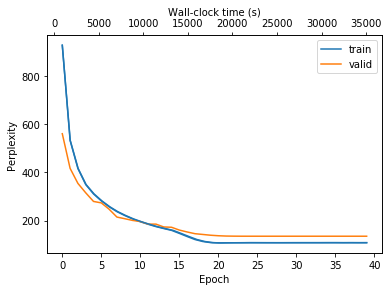

7_Mod=RNN_Opt=ADAM_Dp=0.35_Emb=200_Hid=1500_LR=0.0001_Lay=1


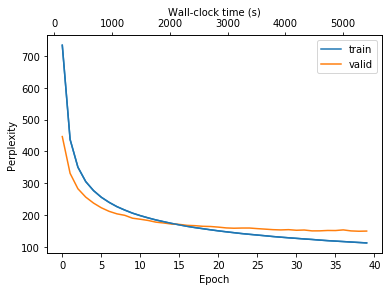

8_Mod=RNN_Opt=ADAM_Dp=0.35_Emb=200_Hid=1500_LR=0.0001_Lay=2


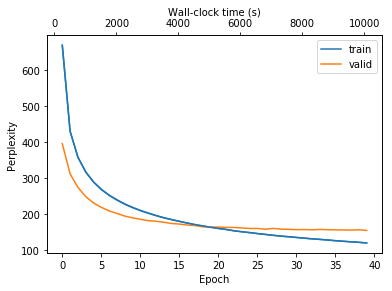

9_Mod=RNN_Opt=ADAM_Dp=0.5_Emb=200_Hid=1500_LR=0.0001_Lay=2


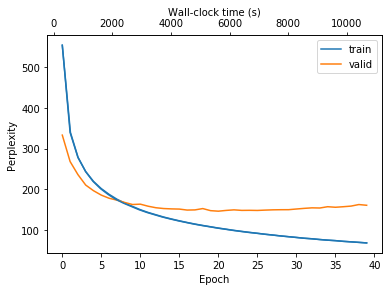

10_Mod=RNN_Opt=SGD_Dp=0.35_Emb=200_Hid=1500_LR=0.0001_Lay=2


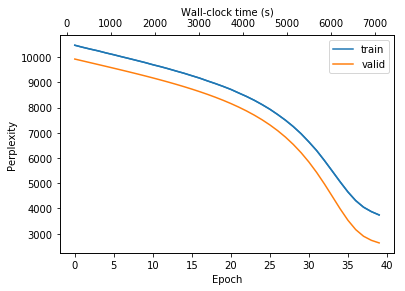

11_Mod=RNN_Opt=SGD_LR_SCHEDULE_Dp=0.35_Emb=200_Hid=512_LR=1.0_Lay=2


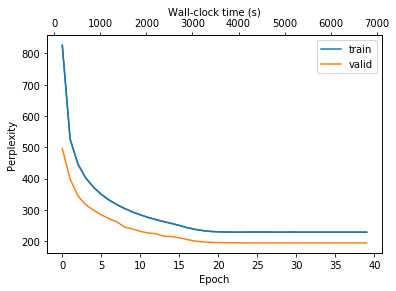

12_Mod=TRANSFORMER_Opt=SGD_LR_SCHEDULE_Dp=0.9_Emb=200_Hid=512_LR=20.0_Lay=1


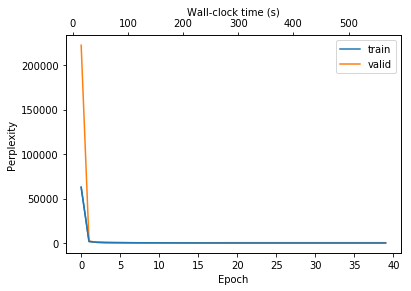

In [41]:
# Generate the training and validation curves for each experimentation w.r.t. epoch and wall-clock time
import matplotlib.pyplot as plt
for exp in experimentations:
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    ax2 = ax1.twiny()
    ax1.plot(np.arange(len(exp['train_ppls'])), exp['train_ppls'])
    ax1.plot(np.arange(len(exp['train_ppls'])), exp['val_ppls'])
    ax1.legend(["train", "valid"])
    ax1.set_xlabel("Epoch")
    ax1.set_ylabel("Perplexity")
    ax2.plot(exp['times'], exp['train_ppls'])
    ax2.set_xlabel("Wall-clock time (s)")
    fig_name = "{}_Mod={}_Opt={}_Dp={}_Emb={}_Hid={}_LR={}_Lay={}".format(exp['id'],
                                                                          exp['config']['model'],
                                                                          exp['config']['optimizer'],
                                                                          exp['config']['dp_keep_prob'],
                                                                          exp['config']['emb_size'],
                                                                          exp['config']['hidden_size'],
                                                                          exp['config']['initial_lr'],
                                                                          exp['config']['num_layers'])
    print(fig_name)
    plt.savefig(os.path.join(picture_folder, fig_name + ".jpg"))
    plt.show()

In [42]:
def plot_valid(experimentations, name):
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    ids = []
    for exp in experimentations:
        ax1.plot(np.arange(len(exp['val_ppls'])), exp['val_ppls'])
        ids.append(exp['id'])
    ax1.legend(ids)
    ax1.set_xlabel("Epoch")
    ax1.set_ylabel("Perplexity")
    epoch_name = "{}_epoch.jpg".format(name)
    print(epoch_name)
    plt.savefig(epoch_name)
    plt.show()

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    for exp in experimentations:
        ax1.plot(exp['times'], exp['val_ppls'])
    ax1.legend(ids)
    ax1.set_xlabel("Wall-clock time (s)")
    wallclock_name = "{}_wallclocktime.jpg".format(name)
    print(wallclock_name)
    plt.savefig(os.path.join(picture_folder, wallclock_name))
    plt.show()

adams_epoch.jpg


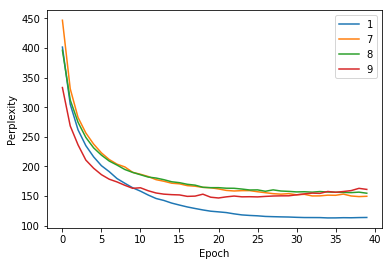

adams_wallclocktime.jpg


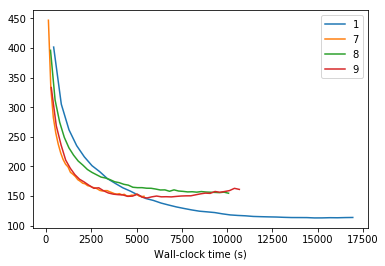

In [43]:
adams = [exp for exp in experimentations if "ADAM" in exp['config']['optimizer']]
plot_valid(adams, "adams")

sgds_epoch.jpg


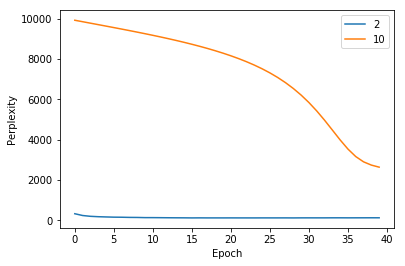

sgds_wallclocktime.jpg


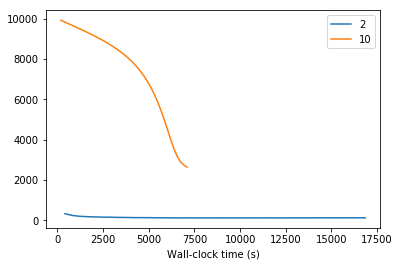

In [44]:
sgds = [exp for exp in experimentations if "SGD" == exp['config']['optimizer']]
plot_valid(sgds, "sgds")

sgds_sched_epoch.jpg


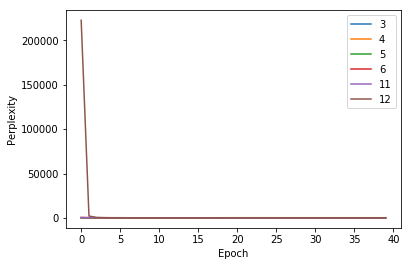

sgds_sched_wallclocktime.jpg


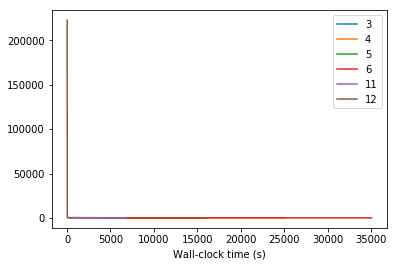

In [45]:
sgds_sched = [exp for exp in experimentations if "SGD_LR_SCHEDULE" in exp['config']['optimizer']]
plot_valid(sgds_sched, "sgds_sched")

transformers_epoch.jpg


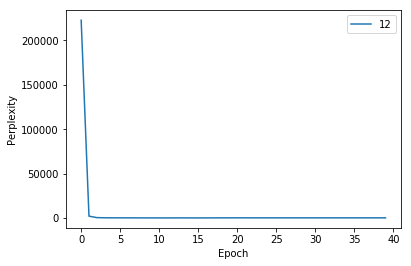

transformers_wallclocktime.jpg


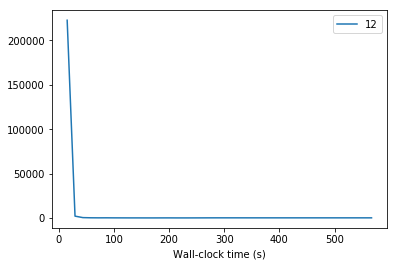

In [46]:
transformers = [exp for exp in experimentations if "TRANSFORMER" in exp['config']['model']]
plot_valid(transformers, "transformers")

grus_epoch.jpg


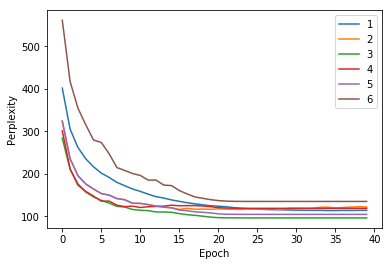

grus_wallclocktime.jpg


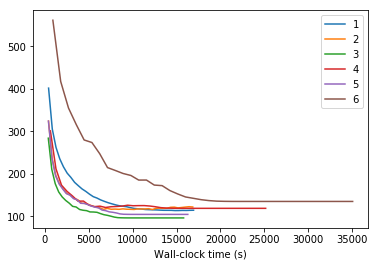

In [47]:
grus = [exp for exp in experimentations if "GRU" == exp['config']['model']]
plot_valid(grus, "grus")

rnns_epoch.jpg


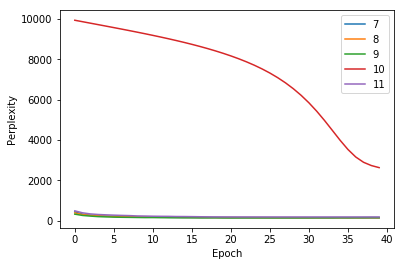

rnns_wallclocktime.jpg


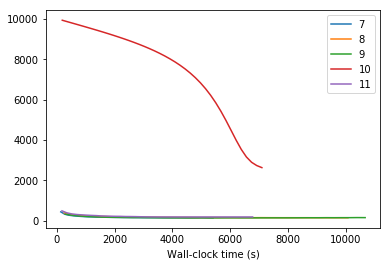

In [48]:
rnns = [exp for exp in experimentations if "RNN" == exp['config']['model']]
plot_valid(rnns, "rnns")